## Zendesk Test: Exploring the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_table('zendesk_challenge (1) (1) (1) (2) (1) (1).tsv', sep = '\t', encoding= "ISO-8859-1") #load data

In [3]:
df.head() 

,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
0,Q1,how are glacier caves formed?,D1,Glacier cave,D1-0,A partly submerged glacier cave on Perito More...,0
1,Q1,how are glacier caves formed?,D1,Glacier cave,D1-1,The ice facade is approximately 60 m high,0
2,Q1,how are glacier caves formed?,D1,Glacier cave,D1-2,Ice formations in the Titlis glacier cave,0
3,Q1,how are glacier caves formed?,D1,Glacier cave,D1-3,A glacier cave is a cave formed within the ice...,1
4,Q1,how are glacier caves formed?,D1,Glacier cave,D1-4,"Glacier caves are often called ice caves , but...",0


In [4]:
df.shape

(20347, 7)

In [5]:
df.describe(include = 'all') # why are there non-unique sentences?

,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
count,20347,20347,20347,20347,20347,20347,20347.000000
unique,2117,2117,1994,1994,18828,18808,NaN
top,Q223,how long is a flat membrane roof good for?,D359,American Civil War,D359-3,"Lincoln issued the Emancipation Proclamation ,...",NaN
freq,30,30,174,174,6,6,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.051064
std,NaN,NaN,NaN,NaN,NaN,NaN,0.220134
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


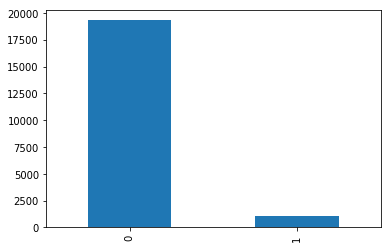

In [6]:
## what are the labels? Count the number of labels
df['Label'].value_counts().plot(kind = 'bar')

In [7]:
ones_only= df[df['Label'] == 1] # subset of data with positive label
ones_only.describe(include = 'all') # some questions have multiple 1 labels

,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
count,1039,1039,1039,1039,1039,1039,1039.0
unique,872,872,851,851,1028,1028,NaN
top,Q141,what composer used sound mass,D1036,Greco-Persian Wars,D1081-2,"The American Civil War (ACW), also known as th...",NaN
freq,7,7,7,7,2,2,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [8]:
#get list of repeated answers
multi_ans = df.groupby(['SentenceID']).count()[df.groupby(df['SentenceID']).count()['DocumentID']>1].reset_index()['SentenceID']

multiples = df[df['SentenceID'].isin(multi_ans.tolist())]

In [9]:
multilabelled = multiples[multiples['Label']== 1] # multiple good answers?
d = multilabelled.groupby(['SentenceID']).count()[multilabelled.groupby(['SentenceID']).count()['Sentence']>1].reset_index()['SentenceID'].tolist()

In [10]:
df[df['SentenceID'].isin(d)].sort_values(by= ['DocumentID']) # Not all multi-answer sentences are accurate

,QuestionID,Question,DocumentID,DocumentTitle,SentenceID,Sentence,Label
12489,Q1827,who made facebook,D1016,Facebook,D1016-2,It was founded in February 2004 by Mark Zucker...,1
7495,Q1053,who created facebook,D1016,Facebook,D1016-2,It was founded in February 2004 by Mark Zucker...,1
7993,Q1123,who kill franz ferdinand ww1,D1081,Assassination of Archduke Franz Ferdinand of A...,D1081-2,"On 28 June 1914, Archduke Franz Ferdinand of A...",1
9780,Q1382,who shot franz ferdinand,D1081,Assassination of Archduke Franz Ferdinand of A...,D1081-2,"On 28 June 1914, Archduke Franz Ferdinand of A...",1
994,Q129,how many stripes on the flag,D129,Flag of the United States,D129-1,The 50 stars on the flag represent the 50 stat...,1
4388,Q622,HOW MANY STRIPES ARE ON THE AMERICAN FLAG,D129,Flag of the United States,D129-1,The 50 stars on the flag represent the 50 stat...,1
19856,Q2966,what was the date of pearl harbor,D1621,Attack on Pearl Harbor,D1621-0,The attack on Pearl Harbor (called Hawaii Oper...,1
11807,Q1710,when did pearl harbor get bombed,D1621,Attack on Pearl Harbor,D1621-0,The attack on Pearl Harbor (called Hawaii Oper...,1
18369,Q2717,what is pci Interface,D1703,Conventional PCI,D1703-0,Conventional PCI (PCI is an initialism formed ...,1
12408,Q1801,what is a PCI port used for,D1703,Conventional PCI,D1703-0,Conventional PCI (PCI is an initialism formed ...,1


## Summary so far: Exploring the data

- Data frame consists of questions and aswers relatint to 1994 unique documents. 
- Each document can have multiple associated questions
- Each question can elicit multiple answers
- Answers are largely unique, but can have some multiple entries for related questions
- Labels represent "useful" answers: not sure whether these are accurate labels, but will assume so going forward
- **Class imbalance with labels: majority of answers are not labelled as "useful"**
- Some multiple answer entires (same answers for different questions) can elicit multiple useful labels (ie. same answers useful to multiple questions), but can also miss the mark. 
- **What determines an accurate answer is largely dependent in context with the question**

## Defining the problem: Predicting usefulness of sentences

- Predicting usefulness: Can we predict if a given answer is useful towards answering the given question? 
    - Due to the relatively small number of entries, a simplification of the problem is required
    - Naive hypothesis: Relevant answers likely contain similar vocabulary to questions (directly answering the question). Is this embedded into the cosine similarity of question-answer pairs?
    - Possible ML models: after reducing the problem to cosine similarity, application of a relatively simple classifier should be possible: logistic regression, svm
    


In [11]:
## undersampling to fix class imbalance
df_0 = df[df['Label']==0].sample(n = 1039, random_state= 10)
df_1 = df[df['Label'] == 1]
df_sub = pd.concat([df_0,df_1])

In [12]:
from sklearn.model_selection import train_test_split
## Using a simple 80-20 train-test split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_sub.iloc[:,:-1], df_sub.iloc[:,-1], test_size = 0.2, random_state = 3)

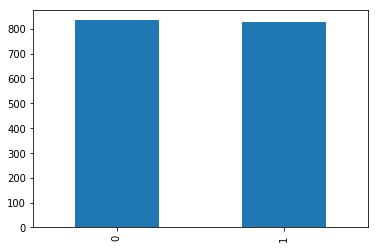

In [13]:
#visualise class imbalance in training and testing data at this stage
Ytrain.value_counts().plot(kind = 'bar')

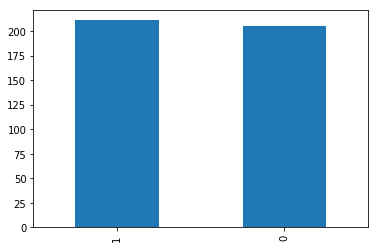

In [14]:
Ytest.value_counts().plot(kind = 'bar')

### Preprocessing the data

In [15]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import *
## text data preprocessing takes a pd.Series, tokenizes, removes stopwords + common punctuations, lemmatizes
def preprocess_text(text):
    stopWords = stopwords.words('english')+['.','$','(', ')', '=', ',', '-', '%', ':', 'in', '?', ';']
    lowercaseData= text.str.lower()
    splitdata = lowercaseData.apply(word_tokenize)
    stopped = splitdata.apply(lambda x: [item for item in x if item not in stopWords])
    lemmatizer = WordNetLemmatizer()
    lemmatized = stopped.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    return lemmatized


In [16]:
train_qn = preprocess_text(Xtrain['Question'])
train_ans = preprocess_text(Xtrain['Sentence'])

In [17]:
test_qn = preprocess_text(Xtest['Question'])
test_ans = preprocess_text(Xtest['Sentence'])

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

#transform into tfidf sparse matrix
tfidfvec = TfidfVectorizer(preprocessor = None, lowercase = False)
tfidfvec.fit(train_qn.apply(lambda x:' '.join(x)).tolist())

tf_train_qn = tfidfvec.transform(train_qn.apply(lambda x:' '.join(x)).tolist())
tf_train_ans = tfidfvec.transform(train_ans.apply(lambda x:' '.join(x)).tolist())

tf_test_qn = tfidfvec.transform(test_qn.apply(lambda x:' '.join(x)).tolist())
tf_test_ans = tfidfvec.transform(test_ans.apply(lambda x:' '.join(x)).tolist())

#### Baseline model: using just TFIDF transformed setntences to predict labels

max AUC:  0.5643509420876199 C:  0.2


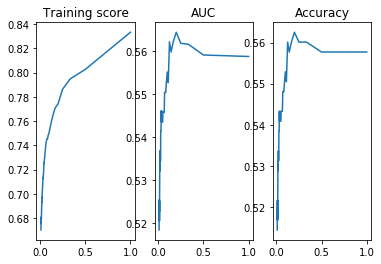

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score

###  baseline model with just tfidf of answers

test_scores = {'AUC':[], 'Accuracy':[]}
train_scores = []
C = []
for c in range(1, 100):
    C.append(1/c)
    logit = LogisticRegression(penalty = 'l2', C = 1/c)
    logit.fit(tf_train_ans, Ytrain)
    prediction = logit.predict(tf_test_ans)
    train_scores.append(logit.score(tf_train_ans, Ytrain))
    test_scores['AUC'].append(roc_auc_score(Ytest, prediction))
    test_scores['Accuracy'].append(accuracy_score(Ytest, prediction))

fig,ax = plt.subplots(1,3)
ax[0].plot(C, train_scores)
ax[1].plot(C, test_scores['AUC'])
ax[2].plot(C, test_scores['Accuracy'])
ax[0].title.set_text('Training score')
ax[1].title.set_text('AUC')
ax[2].title.set_text('Accuracy')
print('max AUC: ',max(test_scores['AUC']), 'C: ',C[test_scores['AUC'].index(max(test_scores['AUC']))])

#### Calculating Cosine Similarity between question-answer pairs

In [20]:
from sklearn.metrics.pairwise import cosine_similarity
## cosine similarity between answers and questions for each pair of q/a
train_sims = pd.DataFrame()
cos_sim = []

for i in range(0, 1662):
    cos_sim.extend(cosine_similarity(tf_train_qn[i], tf_train_ans[i],dense_output = True)[0])
train_sims['cos_sim']= cos_sim



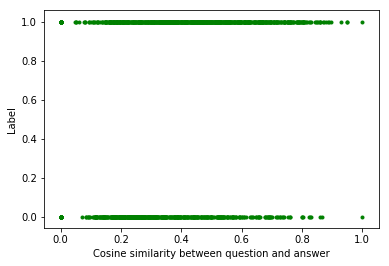

In [21]:
fig, ax = plt.subplots()
ax.scatter(x = cos_sim, y = Ytrain, marker = '.', color = 'g') 
ax.set_ylabel('Label')
ax.set_xlabel('Cosine similarity between question and answer')
#cosine similarity alone is not likely predictive of label: too big of a spread

#### Combining the features

In [22]:
## One way to "combine" sparse and dense features is to add the dense feature to the predicted labels resulting from a sparse model

logit= LogisticRegression(C = 0.2)
logit.fit(tf_train_ans, Ytrain)
pred = logit.predict(tf_test_ans)
transformed = logit.predict(tf_train_ans)
train_sims['out1'] = transformed

In [23]:
test_sim = pd.DataFrame()
cos_test = []
for i in range(0,416):
    cos_test.extend(cosine_similarity(tf_test_qn[i],tf_test_ans[i], dense_output = True)[0])
test_sim['cos_sim']= cos_test
test_sim['out1']= pred

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000200325E45C0>,
      dtype=object)

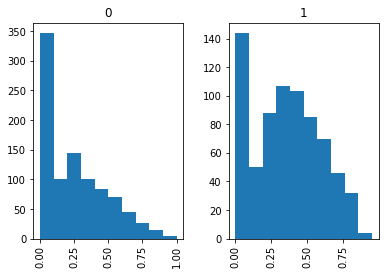

In [24]:
train_sims['cos_sim'].hist(by = train_sims['out1'])

max AUC:  0.5830308634839902 C:  1.0


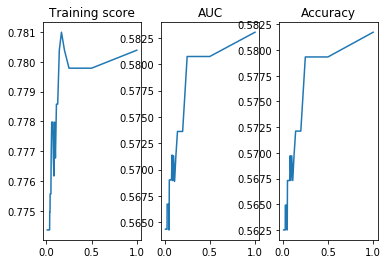

In [25]:
# 2nd logistic regression by comnbining predicted scores and cosine-similarity

test_scores = {'AUC':[], 'Accuracy':[]}
train_scores = []
C = []
for c in range(1, 100):
    C.append(1/c)
    logit = LogisticRegression(penalty = 'l2', C = 1/c)
    logit.fit(train_sims, Ytrain)
    prediction = logit.predict(test_sim)
    train_scores.append(logit.score(train_sims, Ytrain))
    test_scores['AUC'].append(roc_auc_score(Ytest, prediction))
    test_scores['Accuracy'].append(accuracy_score(Ytest, prediction))

fig,ax = plt.subplots(1,3)
ax[0].plot(C, train_scores)
ax[1].plot(C, test_scores['AUC'])
ax[2].plot(C, test_scores['Accuracy'])
ax[0].title.set_text('Training score')
ax[1].title.set_text('AUC')
ax[2].title.set_text('Accuracy')
print('max AUC: ',max(test_scores['AUC']), 'C: ',C[test_scores['AUC'].index(max(test_scores['AUC']))])


In [26]:
# Combining dense and sparse features prior to model training
import numpy as np
## combine cos_sim (dense) with tfidf (sparse)
from scipy.sparse import hstack, csr_matrix
new_train = hstack((tf_train_ans, tf_train_qn,csr_matrix(cos_sim).T))
new_test = hstack((tf_test_ans, tf_test_qn, csr_matrix(cos_test).T))

max AUC:  0.648607097445382 C:  0.25


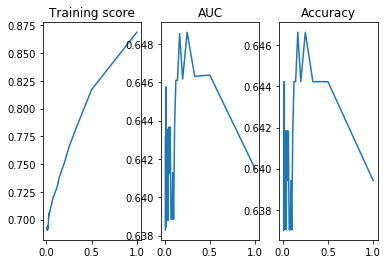

In [27]:
# logistic regression
test_scores = {'AUC':[], 'Accuracy':[]}
train_scores = []
C = []
for c in range(1, 100):
    C.append(1/c)
    logit = LogisticRegression(penalty = 'l2', C = 1/c)
    logit.fit(new_train, Ytrain)
    prediction = logit.predict(new_test)
    train_scores.append(logit.score(new_train, Ytrain))
    test_scores['AUC'].append(roc_auc_score(Ytest, prediction))
    test_scores['Accuracy'].append(accuracy_score(Ytest, prediction))

fig,ax = plt.subplots(1,3)
ax[0].plot(C, train_scores)
ax[1].plot(C, test_scores['AUC'])
ax[2].plot(C, test_scores['Accuracy'])
ax[0].title.set_text('Training score')
ax[1].title.set_text('AUC')
ax[2].title.set_text('Accuracy')
print('max AUC: ',max(test_scores['AUC']), 'C: ',C[test_scores['AUC'].index(max(test_scores['AUC']))])

max AUC:  0.6510461218356259 C:  0.027777777777777776


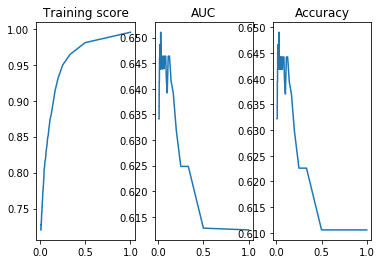

In [28]:
## svm with linear svc
from sklearn import svm

test_scores = {'AUC':[], 'Accuracy':[]}
train_scores = []
C = []
for c in range(1, 100):
    sv = svm.LinearSVC( C = 1/c)
    sv.fit(new_train, Ytrain)
    prediction = sv.predict(new_test)
    C.append(1/c)
    train_scores.append(sv.score(new_train, Ytrain))
    test_scores['AUC'].append(roc_auc_score(Ytest,prediction))
    test_scores['Accuracy'].append(accuracy_score(Ytest,prediction))


fig,ax = plt.subplots(1,3)
ax[0].plot(C, train_scores)
ax[1].plot(C, test_scores['AUC'])
ax[2].plot(C, test_scores['Accuracy'])
ax[0].title.set_text('Training score')
ax[1].title.set_text('AUC')
ax[2].title.set_text('Accuracy')
print('max AUC: ',max(test_scores['AUC']), 'C: ',C[test_scores['AUC'].index(max(test_scores['AUC']))])  

max AUC:  0.6531383655068778 C:  48


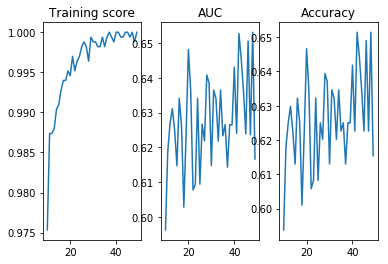

In [29]:
# random forest
from sklearn.ensemble import RandomForestClassifier

test_scores = {'AUC':[], 'Accuracy':[]}
train_scores = []
C = []

for c in range(10, 50):
    rf = RandomForestClassifier(n_estimators = c)
    rf.fit(new_train, Ytrain)
    prediction = rf.predict(new_test)
    C.append(c)
    train_scores.append(rf.score(new_train, Ytrain))
    test_scores['AUC'].append(roc_auc_score(Ytest,prediction))
    test_scores['Accuracy'].append(accuracy_score(Ytest,prediction))


fig,ax = plt.subplots(1,3)
ax[0].plot(C, train_scores)
ax[1].plot(C, test_scores['AUC'])
ax[2].plot(C, test_scores['Accuracy'])
ax[0].title.set_text('Training score')
ax[1].title.set_text('AUC')
ax[2].title.set_text('Accuracy')
print('max AUC: ',max(test_scores['AUC']), 'C: ',C[test_scores['AUC'].index(max(test_scores['AUC']))])  

max AUC:  0.6559241706161137 C:  0.65


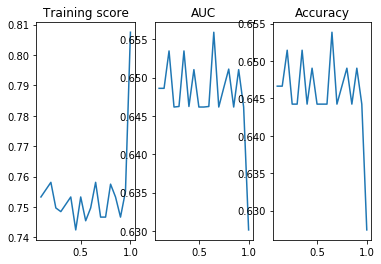

In [30]:
# Ensemble models to improve performance
from sklearn.ensemble import BaggingClassifier

test_scores = {'AUC':[], 'Accuracy':[]}
train_scores = []
C = []

for c in range(0,95, 5):
    bagging = BaggingClassifier(svm.LinearSVC( C = 0.0277), max_samples= (100-c)/100, max_features= 0.6, n_estimators = 100)
    bagging.fit(new_train, Ytrain)
    predictions = bagging.predict(new_test)
    C.append((100-c)/100)
    train_scores.append(bagging.score(new_train, Ytrain)), 
    test_scores['AUC'].append(roc_auc_score(Ytest,predictions))
    test_scores['Accuracy'].append(accuracy_score(Ytest,predictions))
    
fig,ax = plt.subplots(1,3)
ax[0].plot(C, train_scores)
ax[1].plot(C, test_scores['AUC'])
ax[2].plot(C, test_scores['Accuracy'])
ax[0].title.set_text('Training score')
ax[1].title.set_text('AUC')
ax[2].title.set_text('Accuracy')
print('max AUC: ',max(test_scores['AUC']), 'C: ',C[test_scores['AUC'].index(max(test_scores['AUC']))])  

In [31]:
# stacking classifiers

from mlxtend.classifier import StackingClassifier

stack = StackingClassifier(classifiers=[logit, sv, rf], meta_classifier = logit)
stack.fit(new_train, Ytrain)
pred = stack.predict(new_test)

print('Training: ',stack.score(new_train, Ytrain),'AUC: ',roc_auc_score(Ytest, pred), 'Accuracy: ',accuracy_score(Ytest,pred))

Training:  1.0 AUC:  0.6454051554733556 Accuracy:  0.6442307692307693


## Summary so far: Predicting usefulness

- Due to overwhelming class imbalance, I chose to undersample the '0' labels to even out the classes, resulting in a 1039 values per class (as a note, I attempted apply the model without correcting for class imbalance, and all classifiers just guessed '0' for all test data)
- A 80/20 split for training and test was conducted: perhaps k fold cross validation may be better for this small dataset 
- Passing sentences (tfidf transformed) as baseline: accuracy of 56% is not much better than guessing
- Calculating similarity between questions and answers using cosine-similarity is helpful, but can only achieve mid-60% performance ([This paper](https://link.springer.com/article/10.1007/s10791-010-9136-6) demonstrates the combination of tfidf with the use of similaity, although they have done so to a much greater extent than what I attempted here)
- Cosine similarity employed here can be considered as lexical similarity, perhaps using a semantic similaity measure like wordnet similarity representations could improve the results here - 
- logistic regression, SVM and random forest all achieve similar results, no discernable difference even with stacking or bagging classifiers. 


## Addition of wordnet similarity 

In [32]:
## integrating wordnet similarity: 
#following functions are modified from https://nlpforhackers.io/wordnet-sentence-similarity/
from nltk.corpus import wordnet as wn
from nltk import pos_tag

def penn_to_wn(tag):
    """ Convert between a Penn Treebank tag to a simplified Wordnet tag """
    if tag.startswith('N'):
        return 'n'
 
    if tag.startswith('V'):
        return 'v'
 
    if tag.startswith('J'):
        return 'a'
 
    if tag.startswith('R'):
        return 'r'
 
    return None


def tagged_to_synset(word, tag):
    wn_tag = penn_to_wn(tag)
    if wn_tag is None:
        return None
 
    try:
        return wn.synsets(word, wn_tag)[0]
    except:
        return None
    
def sentence_similarity(sentence1, sentence2):
    """ compute the sentence similarity using Wordnet """
    # Tokenize and tag
    sentence1 = pos_tag(sentence1)
    sentence2 = pos_tag(sentence2)
 
    # Get the synsets for the tagged words
    synsets1 = [tagged_to_synset(*tagged_word) for tagged_word in sentence1]
    synsets2 = [tagged_to_synset(*tagged_word) for tagged_word in sentence2]
 
    # Filter out the Nones
    synsets1 = [ss for ss in synsets1 if ss]
    synsets2 = [ss for ss in synsets2 if ss]
 
    score = []
 
    # For each word in the first sentence
    for synset in synsets1:
        # Get the similarity value of the most similar word in the other sentence
        try:
            best_score = max([synset.path_similarity(ss) for ss in synsets2 if synset.path_similarity(ss) is not None])
        except ValueError:
            best_score = 0
        if best_score != 0:
            score.append(best_score)
 
    # Average the values
    if len(score) > 0:
        final = sum(score)/len(score)
    else:
        final = 0
    return final

In [33]:
wn_sim = []
for i in range(0,1662):
    wn_sim.append(sentence_similarity(train_qn.iloc[i],train_ans.iloc[i]))

In [34]:
wn_sim_test = []
for i in range(0,416):
    wn_sim_test.append(sentence_similarity(test_qn.iloc[i],test_ans.iloc[i]))

In [35]:
# Combining dense and sparse features prior to model training
## combine wn_sim (dense) with tfidf (sparse)
train_wn = hstack((new_train,csr_matrix(wn_sim).T))
test_wn = hstack((new_test, csr_matrix(wn_sim_test).T))

max AUC:  0.6527222286440874 C:  0.5


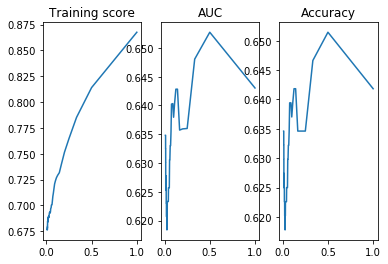

In [36]:
# logistic regression
test_scores = {'AUC':[], 'Accuracy':[]}
train_scores = []
C = []
for c in range(1, 100):
    C.append(1/c)
    logit = LogisticRegression(penalty = 'l2', C = 1/c)
    logit.fit(train_wn, Ytrain)
    prediction = logit.predict(test_wn)
    train_scores.append(logit.score(train_wn, Ytrain))
    test_scores['AUC'].append(roc_auc_score(Ytest, prediction))
    test_scores['Accuracy'].append(accuracy_score(Ytest, prediction))

fig,ax = plt.subplots(1,3)
ax[0].plot(C, train_scores)
ax[1].plot(C, test_scores['AUC'])
ax[2].plot(C, test_scores['Accuracy'])
ax[0].title.set_text('Training score')
ax[1].title.set_text('AUC')
ax[2].title.set_text('Accuracy')
print('max AUC: ',max(test_scores['AUC']), 'C: ',C[test_scores['AUC'].index(max(test_scores['AUC']))])

max AUC:  0.6551612530343314 C:  0.0625


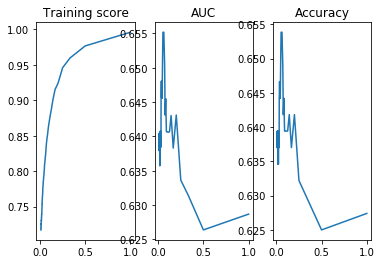

In [37]:
## svm with linear svc
from sklearn import svm

test_scores = {'AUC':[], 'Accuracy':[]}
train_scores = []
C = []
for c in range(1, 100):
    sv = svm.LinearSVC( C = 1/c)
    sv.fit(train_wn, Ytrain)
    prediction = sv.predict(test_wn)
    C.append(1/c)
    train_scores.append(sv.score(train_wn, Ytrain))
    test_scores['AUC'].append(roc_auc_score(Ytest,prediction))
    test_scores['Accuracy'].append(accuracy_score(Ytest,prediction))


fig,ax = plt.subplots(1,3)
ax[0].plot(C, train_scores)
ax[1].plot(C, test_scores['AUC'])
ax[2].plot(C, test_scores['Accuracy'])
ax[0].title.set_text('Training score')
ax[1].title.set_text('AUC')
ax[2].title.set_text('Accuracy')
print('max AUC: ',max(test_scores['AUC']), 'C: ',C[test_scores['AUC'].index(max(test_scores['AUC']))])  

max AUC:  0.6813663160328286 C:  32


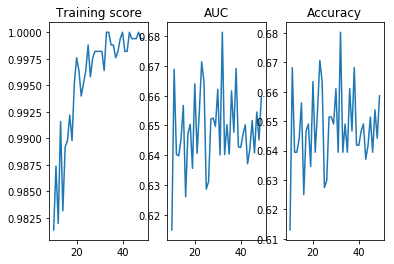

In [38]:
# random forest
from sklearn.ensemble import RandomForestClassifier

test_scores = {'AUC':[], 'Accuracy':[]}
train_scores = []
C = []

for c in range(10, 50):
    rf = RandomForestClassifier(n_estimators = c)
    rf.fit(train_wn, Ytrain)
    prediction = rf.predict(test_wn)
    C.append(c)
    train_scores.append(rf.score(train_wn, Ytrain))
    test_scores['AUC'].append(roc_auc_score(Ytest,prediction))
    test_scores['Accuracy'].append(accuracy_score(Ytest,prediction))


fig,ax = plt.subplots(1,3)
ax[0].plot(C, train_scores)
ax[1].plot(C, test_scores['AUC'])
ax[2].plot(C, test_scores['Accuracy'])
ax[0].title.set_text('Training score')
ax[1].title.set_text('AUC')
ax[2].title.set_text('Accuracy')
print('max AUC: ',max(test_scores['AUC']), 'C: ',C[test_scores['AUC'].index(max(test_scores['AUC']))])  

max AUC:  0.6430354872269102 C:  0.7


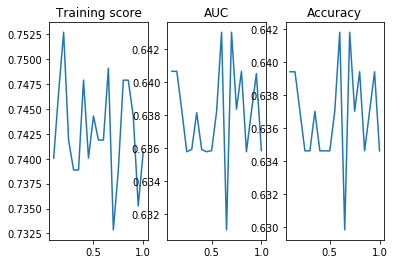

In [39]:
# Ensemble models to improve performance
from sklearn.ensemble import BaggingClassifier

test_scores = {'AUC':[], 'Accuracy':[]}
train_scores = []
C = []

for c in range(0,95, 5):
    bagging = BaggingClassifier(svm.LinearSVC( C = 0.0277), max_samples= (100-c)/100, max_features= 0.6, n_estimators = 100)
    bagging.fit(train_wn, Ytrain)
    predictions = bagging.predict(test_wn)
    C.append((100-c)/100)
    train_scores.append(bagging.score(train_wn, Ytrain)), 
    test_scores['AUC'].append(roc_auc_score(Ytest,predictions))
    test_scores['Accuracy'].append(accuracy_score(Ytest,predictions))
    
fig,ax = plt.subplots(1,3)
ax[0].plot(C, train_scores)
ax[1].plot(C, test_scores['AUC'])
ax[2].plot(C, test_scores['Accuracy'])
ax[0].title.set_text('Training score')
ax[1].title.set_text('AUC')
ax[2].title.set_text('Accuracy')
print('max AUC: ',max(test_scores['AUC']), 'C: ',C[test_scores['AUC'].index(max(test_scores['AUC']))])  

In [40]:
# stacking classifiers

from mlxtend.classifier import StackingClassifier

stack = StackingClassifier(classifiers=[logit, sv, rf], meta_classifier = logit)
stack.fit(train_wn, Ytrain)
pred = stack.predict(test_wn)

print('Training: ',stack.score(train_wn, Ytrain),'AUC: ',roc_auc_score(Ytest, pred), 'Accuracy: ',accuracy_score(Ytest,pred))

Training:  0.9993983152827918 AUC:  0.6522367356374985 Accuracy:  0.6514423076923077


## Summary so far: Addition of wordnet sentence similarity

- Some improvement over tfidf + cosine similarity, but really marginal at this stage (going from AUC 0.61 - 0.65 to 0.62 - 0.68)
- Other improvements to this model could be using word-vector embeddings instead of the tfidf - ie. GloVe or Word2Vec for more flexibility with the features


## Problem definition: Topic modelling

- Can underlying topics be described by questions or answers?
- LDA analysis comparing words with topics

In [41]:
df['DocumentID'].value_counts().describe() # not possible to get 1994 topics here, let's try 20

count    1994.000000
mean       10.204112
std         8.600515
min         1.000000
25%         5.000000
50%         8.000000
75%        14.000000
max       174.000000
Name: DocumentID, dtype: float64

In [44]:
from gensim.models import ldamodel
from gensim.corpora import Dictionary
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [46]:
train_qn_2 = preprocess_text(df['Question'])

In [49]:
id2word = Dictionary(train_qn_2)
corpus = [id2word.doc2bow(text) for text in train_qn_2 ]
lda = ldamodel.LdaModel(corpus, id2word= id2word, num_topics = 20)

In [50]:
pp.pprint(lda.print_topics())

[   (   0,
        '0.108*"state" + 0.074*"president" + 0.056*"spoken" + 0.055*"basque" + '
        '0.055*"u" + 0.036*"known" + 0.028*"elected" + 0.028*"united" + '
        '0.023*"leader" + 0.020*"city"'),
    (   1,
        '0.050*"family" + 0.042*"tire" + 0.041*"sister" + 0.033*"platypus" + '
        '0.033*"plural" + 0.033*"act" + 0.024*"process" + 0.023*"language" + '
        '0.022*"make" + 0.021*"round"'),
    (   2,
        '0.125*"system" + 0.071*"apple" + 0.063*"alpine" + 0.036*"play" + '
        '0.028*"rate" + 0.024*"football" + 0.019*"usa" + 0.019*"become" + '
        '0.018*"mark" + 0.015*"league"'),
    (   3,
        '0.056*"born" + 0.054*"income" + 0.052*"natural" + 0.052*"gas" + '
        '0.050*"average" + 0.049*"baby" + 0.048*"america" + 0.029*"dating" + '
        '0.028*"2" + 0.026*"population"'),
    (   4,
        '0.243*"\'s" + 0.097*"found" + 0.049*"new" + 0.031*"war" + '
        '0.030*"chupacabra" + 0.026*"end" + 0.025*"day" + 0.023*"person" + '
        '0.0

In [51]:
train_ans_2 = preprocess_text(df['Sentence'])
id2word2 = Dictionary(train_ans_2)
corpus2 = [id2word.doc2bow(text) for text in train_ans_2 ]
lda.update(corpus2)

In [52]:
pp.pprint(lda.print_topics()) 

[   (   0,
        '0.174*"state" + 0.120*"united" + 0.070*"known" + 0.049*"city" + '
        '0.034*"president" + 0.032*"south" + 0.026*"basque" + 0.025*"u" + '
        '0.024*"became" + 0.018*"spanish"'),
    (   1,
        '0.038*"term" + 0.036*"family" + 0.036*"company" + 0.032*"called" + '
        '0.030*"language" + 0.024*"four" + 0.023*"television" + 0.018*"act" + '
        '0.018*"created" + 0.017*"nation"'),
    (   2,
        '0.060*"system" + 0.049*"second" + 0.033*"program" + 0.028*"public" + '
        '0.027*"total" + 0.026*"development" + 0.025*"europe" + 0.024*"line" + '
        '0.024*"league" + 0.022*"rate"'),
    (   3,
        '0.051*"well" + 0.049*"population" + 0.048*"america" + 0.033*"born" + '
        '0.031*"gas" + 0.031*"international" + 0.030*"natural" + '
        '0.030*"income" + 0.029*"type" + 0.021*"place"'),
    (   4,
        '0.286*"\'s" + 0.087*"new" + 0.047*"u.s." + 0.031*"day" + 0.030*"war" '
        '+ 0.023*"found" + 0.022*"individual" + 0.022*"yor

In [54]:
# interesting interactive visualisation with pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus2, id2word)

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
1      7.422364        1       1  0.085230 -0.101637
12     7.391776        1       2 -0.047434 -0.043435
0      6.242959        1       3 -0.019715  0.118254
13     6.062864        1       4 -0.007324 -0.074598
4      5.627987        1       5  0.157284  0.178987
14     5.416321        1       6  0.168095 -0.052948
10     5.130936        1       7  0.214656  0.154877
2      4.915544        1       8  0.043219 -0.022156
18     4.901886        1       9  0.021193 -0.110665
19     4.725621        1      10 -0.020908 -0.182915
3      4.576585        1      11  0.123214  0.146788
15     4.516577        1      12 -0.051047 -0.139271
17     4.429848        1      13 -0.029617  0.005314
11     4.330876        1      14 -0.097698  0.151432
9      4.165014        1      15  0.048792 -0.072428
8      4.142692        1      16 -0.059903 -0.070984
16     4.094457        1      17 -0.222884  0.128102
5      4.089462        1      18 -0.076646 -0.011228
6      3.970972        1      19  0.013176 -0.110891
7      3.845256        1      20 -0.241684  0.109401, topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
69    Default  2529.000000          's  2529.000000  30.0000  30.0000
630   Default  2624.000000          ``  2624.000000  29.0000  29.0000
629   Default  1836.000000          ''  1836.000000  28.0000  28.0000
147   Default  1704.000000       state  1704.000000  27.0000  27.0000
148   Default  1174.000000      united  1174.000000  26.0000  26.0000
56    Default   948.000000         one   948.000000  25.0000  25.0000
372   Default   908.000000       world   908.000000  24.0000  24.0000
98    Default   853.000000    american   853.000000  23.0000  23.0000
32    Default   845.000000        used   845.000000  22.0000  22.0000
232   Default   913.000000       first   913.000000  21.0000  21.0000
243   Default   767.000000         new   767.000000  20.0000  20.0000
373   Default   637.000000        film   637.000000  19.0000  19.0000
2772  Default   687.000000       known   687.000000  18.0000  18.0000
1151  Default   583.000000     million   583.000000  17.0000  17.0000
248   Default   562.000000     country   562.000000  16.0000  16.0000
413   Default   590.000000      series   590.000000  15.0000  15.0000
423   Default   560.000000        area   560.000000  14.0000  14.0000
356   Default   721.000000        year   721.000000  13.0000  13.0000
456   Default   551.000000        part   551.000000  12.0000  12.0000
156   Default   610.000000        name   610.000000  11.0000  11.0000
107   Default   459.000000           '   459.000000  10.0000  10.0000
591   Default   449.000000       often   449.000000   9.0000   9.0000
35    Default   459.000000      system   459.000000   8.0000   8.0000
272   Default   419.000000         use   419.000000   7.0000   7.0000
59    Default   537.000000        time   537.000000   6.0000   6.0000
310   Default   480.000000        city   480.000000   5.0000   5.0000
383   Default   465.000000       group   465.000000   4.0000   4.0000
808   Default   495.000000         two   495.000000   3.0000   3.0000
353   Default   436.000000    national   436.000000   2.0000   2.0000
234   Default   502.000000      number   502.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
1963  Topic20   165.286335   economics   165.817587   3.2551  -3.5949
651   Topic20   135.136172       space   135.623032   3.2547  -3.7963
129   Topic20   132.576903       actor   133.065424   3.2547  -3.8154
1712  Topic20    82.451821       radio    82.963744   3.2521  -4.2904
531   Topic20    70.309952  successful    70.798421   3.2514  -4.4497
655   Topic20    70.076229   insurance    70.563090   3.2514  -4.4530
2897  Topic20   124.676703        sale   125.609453   3.2509 

## Summary: topic modelling

- Brief try of LDA topic modelling with this corpus. It appears that Questions and answers are quite effective in indicating some topics
- Interpretation is a little more difficult since this analysis is unsupervised


## Overall summary:

- NLP is difficult! Feature engineering appears to make a difference, but finding the right combination of things is also key. 
- Unsupervised methods for topic modelling can possibly be improved by using word embedings in such a small corpus
- If given more time: I would integrate either word2vec or GloVe embeddings to the bow approach
- ML models: I would try to build a simple recurrent neural network to see if that can improve the predictions, however keeping in mind that even with the "simpler" models here, some over-fitting can already be seen with this dataset. 
- More questions to consider: If these answers are user-generated, a further exploration of sentiment analsyis could be beneficial towards rating the toxicity of the content.